# Análisis Exploratorio de Datos (AED) - Cancelación de clientes Interconnect

Este notebook contiene la preparación del entorno y la carga de los datos para el análisis de cancelación de clientes de Interconnect.

In [1]:
# Importar todas las librerías necesarias para el AED
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Cargar los archivos de datos con manejo de errores
try:
	contract = pd.read_csv('contract.csv')
	print("contract.csv cargado correctamente.")
except Exception as e:
	print(f"Error al cargar contract.csv: {e}")

try:
	personal = pd.read_csv('personal.csv')
	print("personal.csv cargado correctamente.")
except Exception as e:
	print(f"Error al cargar personal.csv: {e}")

try:
	internet = pd.read_csv('internet.csv')
	print("internet.csv cargado correctamente.")
except Exception as e:
	print(f"Error al cargar internet.csv: {e}")

try:
	phone = pd.read_csv('phone.csv')
	print("phone.csv cargado correctamente.")
except Exception as e:
	print(f"Error al cargar phone.csv: {e}")

contract.csv cargado correctamente.
personal.csv cargado correctamente.
internet.csv cargado correctamente.
phone.csv cargado correctamente.


## Visualización de las primeras filas de los datos
A continuación se muestran las primeras filas de cada DataFrame para verificar la correcta importación y explorar la estructura inicial de los datos.

In [3]:
# Visualizar las primeras filas de cada DataFrame
print('contract.csv')
display(contract.head())
print('personal.csv')
display(personal.head())
print('internet.csv')
display(internet.head())
print('phone.csv')
display(phone.head())

contract.csv


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


personal.csv


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


internet.csv


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


phone.csv


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


## Análisis de estructura y calidad de los datos
En esta sección se revisa la estructura, tipos de datos, valores nulos y duplicados de cada DataFrame. También se muestran estadísticas descriptivas para variables numéricas y categóricas.

In [ ]:
# Limpieza de datos: valores nulos, duplicados y tipos de datos
from pandas.api.types import is_numeric_dtype, is_datetime64_any_dtype
dataframes = {'contract': contract, 'personal': personal, 'internet': internet, 'phone': phone}

# 1. Eliminar duplicados
for name, df in dataframes.items():
    before = df.shape[0]
    df.drop_duplicates(inplace=True)
    after = df.shape[0]
    print(f"{name}: {before - after} duplicados eliminados.")

# 2. Tratar valores nulos 
for name, df in dataframes.items():
    nulls = df.isnull().sum()
    print(f"\nValores nulos en {name} antes del tratamiento:")
    print(nulls[nulls > 0])
    # Ejemplo: rellenar numéricos con la mediana, categóricos con el modo
    for col in df.columns:
        if df[col].isnull().any():
            if is_numeric_dtype(df[col]):
                df[col].fillna(df[col].median(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)
    print(f"Valores nulos en {name} después del tratamiento:")
    print(df.isnull().sum().sum())

# 3. Conversión de tipos de datos 
if 'BeginDate' in contract.columns:
    contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], errors='coerce')
# NO modificar EndDate aquí, se deja como string para crear la variable objetivo correctamente
if 'TotalCharges' in contract.columns:
    contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')

# Verificar los cambios
for name, df in dataframes.items():
    print(f"\n--- {name}.csv ---")
    print(df.info())
    print('Valores nulos por columna:')
    print(df.isnull().sum())
    print('Duplicados:', df.duplicated().sum())

contract: 0 duplicados eliminados.
personal: 0 duplicados eliminados.
internet: 0 duplicados eliminados.
phone: 0 duplicados eliminados.

Valores nulos en contract antes del tratamiento:
Series([], dtype: int64)
Valores nulos en contract después del tratamiento:
0

Valores nulos en personal antes del tratamiento:
Series([], dtype: int64)
Valores nulos en personal después del tratamiento:
0

Valores nulos en internet antes del tratamiento:
Series([], dtype: int64)
Valores nulos en internet después del tratamiento:
0

Valores nulos en phone antes del tratamiento:
Series([], dtype: int64)
Valores nulos en phone después del tratamiento:
0

--- contract.csv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate 

In [5]:
# Fusión de los datasets en un dataset maestro
# Se asume que la columna clave es 'customerID' y está presente en todos los DataFrames
maestro = contract.merge(personal, on='customerID', how='left')\
                .merge(internet, on='customerID', how='left')\
                .merge(phone, on='customerID', how='left')
print(f"Shape del dataset maestro: {maestro.shape}")
display(maestro.head())

Shape del dataset maestro: (7043, 20)


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [6]:
# Crear variable objetivo 'Churn' y convertir EndDate a datetime solo para cancelados
if 'EndDate' in maestro.columns:
    maestro['Churn'] = maestro['EndDate'].apply(lambda x: 0 if str(x).strip().lower() == 'no' else 1)
    # Convertir EndDate a datetime solo si no es 'No'
    maestro['EndDate'] = maestro['EndDate'].apply(lambda x: np.nan if str(x).strip().lower() == 'no' else x)
    maestro['EndDate'] = pd.to_datetime(maestro['EndDate'], errors='coerce')
    print('Conteo de clases en Churn:')
    print(maestro['Churn'].value_counts())
    print('\nDistribución de la variable objetivo (Churn):')
    print(maestro['Churn'].value_counts(normalize=True).map('{:.2%}'.format))

Conteo de clases en Churn:
Churn
0    5174
1    1869
Name: count, dtype: int64

Distribución de la variable objetivo (Churn):
Churn
0    73.46%
1    26.54%
Name: proportion, dtype: object


### Fusión de los datasets en un dataset maestro
Para facilitar el análisis y modelado, se fusionarán los diferentes datasets en un solo DataFrame maestro utilizando la columna clave que comparten (por ejemplo, 'customerID'). Esto permitirá tener toda la información relevante de cada cliente en una sola tabla.

Variables numéricas: ['MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Churn']
Variables categóricas: ['customerID', 'Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']


,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
Churn,7043.0,0.265370,0.441561,0.00,0.00,0.000,1.0000,1.00


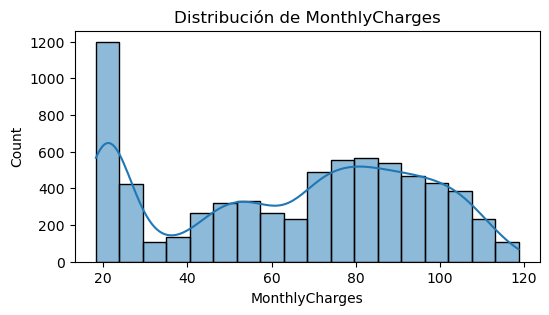

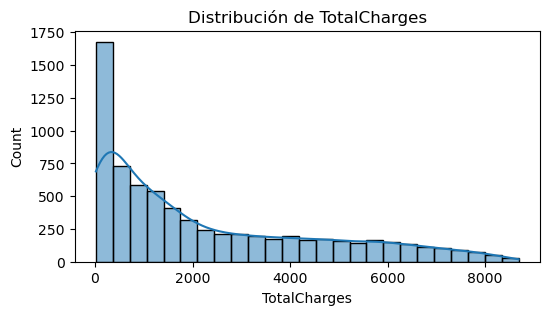

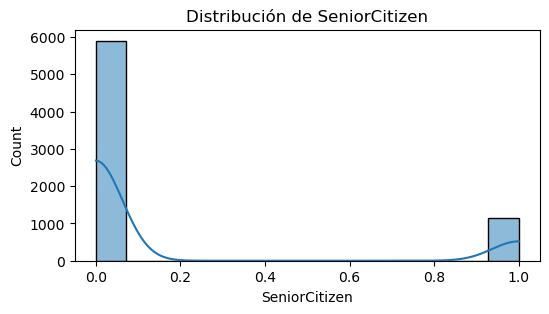

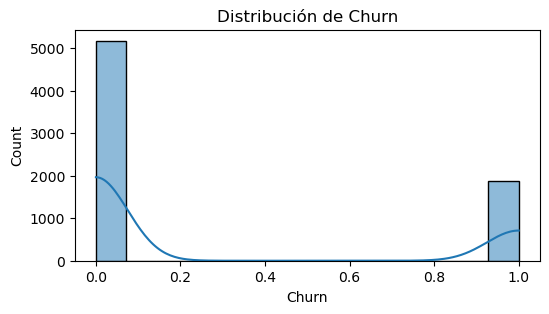


customerID (valores únicos: 7043)
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64


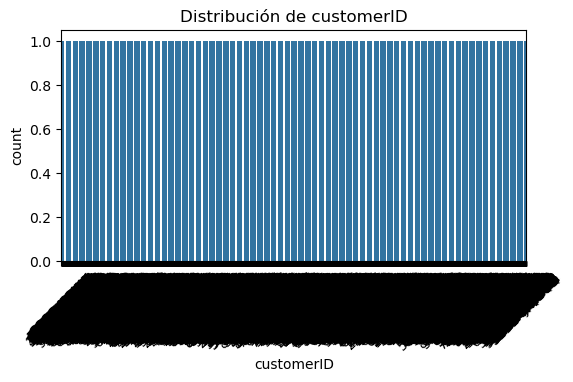


Type (valores únicos: 3)
Type
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


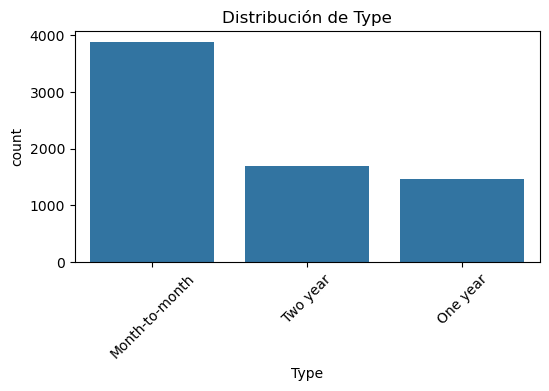


PaperlessBilling (valores únicos: 2)
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


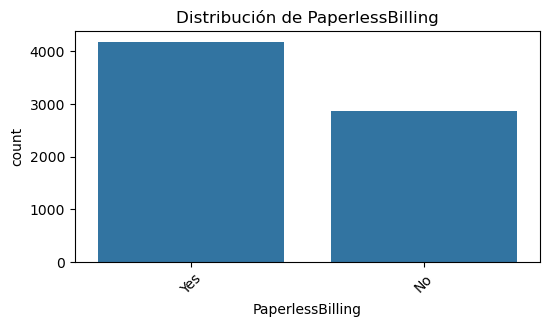


PaymentMethod (valores únicos: 4)
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


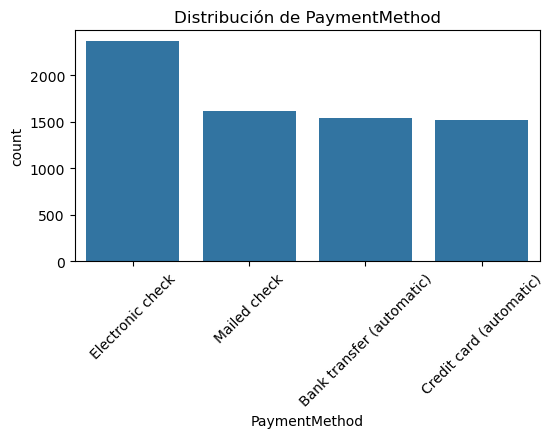


gender (valores únicos: 2)
gender
Male      3555
Female    3488
Name: count, dtype: int64


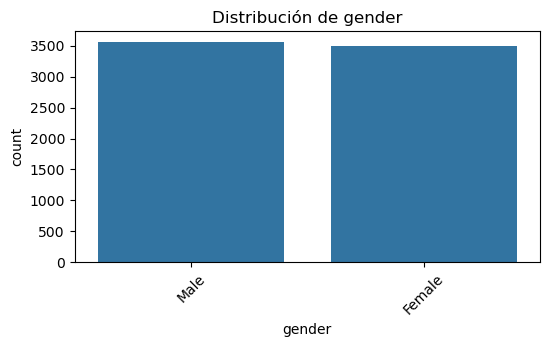


Partner (valores únicos: 2)
Partner
No     3641
Yes    3402
Name: count, dtype: int64


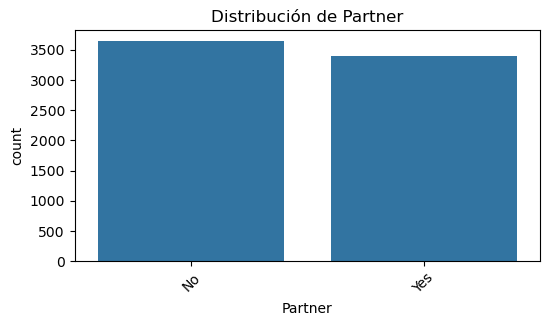


Dependents (valores únicos: 2)
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


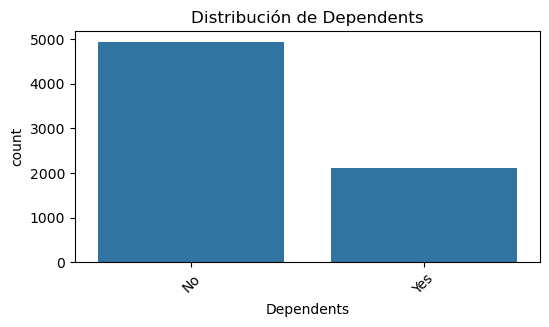


InternetService (valores únicos: 2)
InternetService
Fiber optic    3096
DSL            2421
NaN            1526
Name: count, dtype: int64


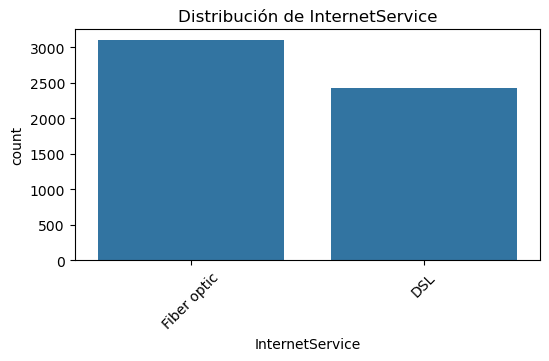


OnlineSecurity (valores únicos: 2)
OnlineSecurity
No     3498
Yes    2019
NaN    1526
Name: count, dtype: int64


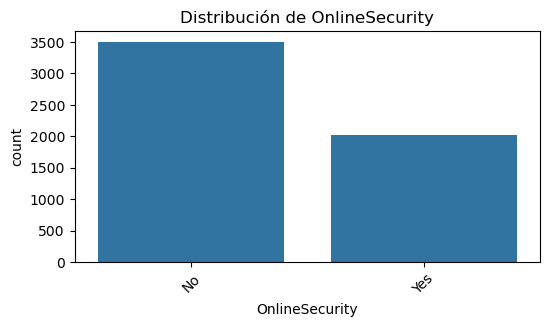


OnlineBackup (valores únicos: 2)
OnlineBackup
No     3088
Yes    2429
NaN    1526
Name: count, dtype: int64


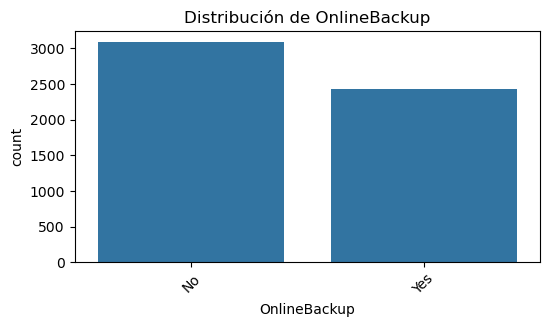


DeviceProtection (valores únicos: 2)
DeviceProtection
No     3095
Yes    2422
NaN    1526
Name: count, dtype: int64


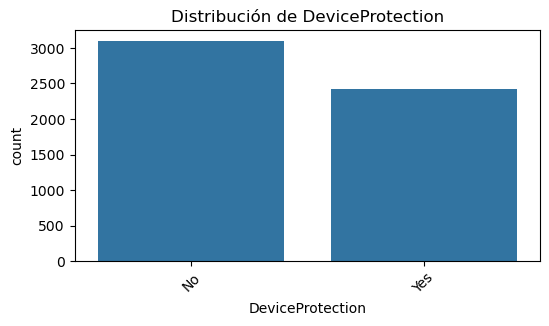


TechSupport (valores únicos: 2)
TechSupport
No     3473
Yes    2044
NaN    1526
Name: count, dtype: int64


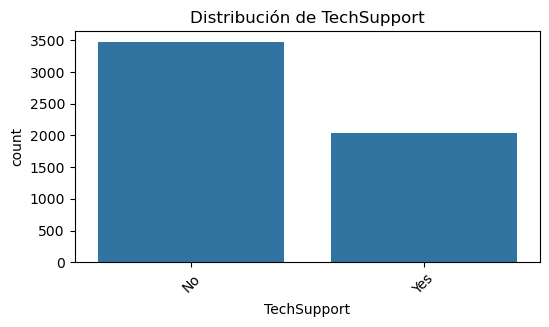


StreamingTV (valores únicos: 2)
StreamingTV
No     2810
Yes    2707
NaN    1526
Name: count, dtype: int64


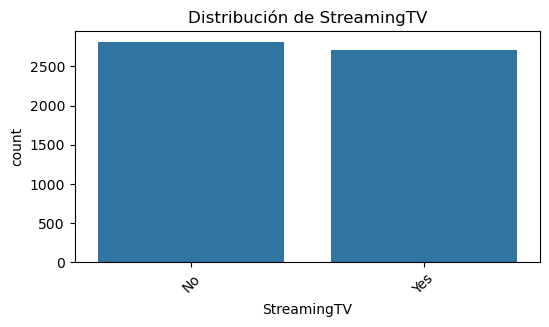


StreamingMovies (valores únicos: 2)
StreamingMovies
No     2785
Yes    2732
NaN    1526
Name: count, dtype: int64


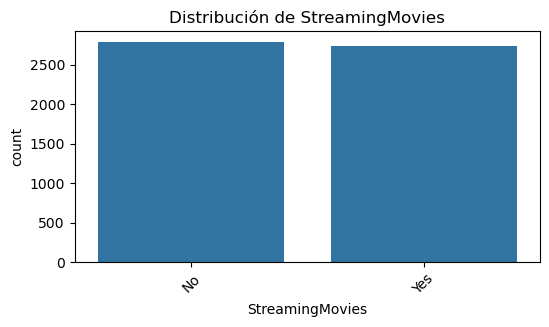


MultipleLines (valores únicos: 2)
MultipleLines
No     3390
Yes    2971
NaN     682
Name: count, dtype: int64


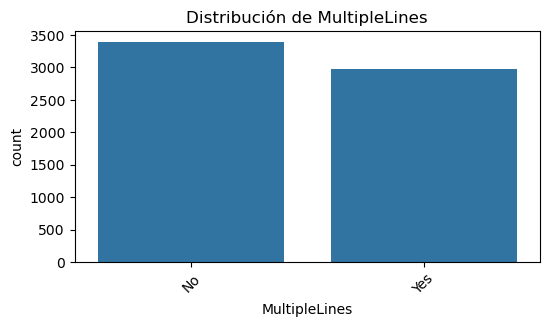

In [7]:
# Análisis exploratorio de variables numéricas y categóricas
num_cols = maestro.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = maestro.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print('Variables numéricas:', num_cols)
print('Variables categóricas:', cat_cols)

# Estadísticas descriptivas para variables numéricas
display(maestro[num_cols].describe().T)

# Visualización de la distribución de variables numéricas
import matplotlib.pyplot as plt
import seaborn as sns
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(maestro[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

# Estadísticas y conteos para variables categóricas
for col in cat_cols:
    print(f'\n{col} (valores únicos: {maestro[col].nunique()})')
    print(maestro[col].value_counts(dropna=False))
    plt.figure(figsize=(6,3))
    sns.countplot(data=maestro, x=col, order=maestro[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()

### Conclusiones del análisis exploratorio
- Las variables numéricas muestran la dispersión y tendencia central de los datos, permitiendo identificar posibles outliers y rangos atípicos. La mayoría de las variables presentan distribuciones esperadas, aunque es importante revisar aquellas con asimetría o valores extremos.
- Las variables categóricas permiten observar la composición de la base de clientes, destacando las categorías más frecuentes y posibles desbalances en los datos (por ejemplo, predominancia de ciertos tipos de contrato o servicios).
- El análisis exploratorio revela patrones iniciales y posibles relaciones entre variables que serán útiles para el modelado predictivo y la identificación de factores asociados a la cancelación de clientes.
- Se recomienda profundizar en el análisis de correlaciones y relaciones entre variables clave, así como explorar la segmentación de clientes según características relevantes.

# Preguntas:

¿Qué métrica de evaluación es prioritaria para el negocio (accuracy, recall, precision, F1, ROC-AUC, etc.)?

¿El modelo se usará para predecir la cancelación individual de cada cliente o para estimar la tasa global de cancelación?

¿Se busca identificar clientes en riesgo para campañas preventivas o solo estimar la tasa general?

¿Existen variables que, por políticas internas, no deban ser usadas en el modelo?

#Plan preliminar de trabajo

1. **Integración y limpieza de datos:** Fusionar los diferentes archivos de datos en un solo dataset maestro, tratar valores nulos, duplicados y asegurar la correcta tipificación de las variables.
2. **Análisis exploratorio de datos (EDA):** Analizar la distribución y relaciones de las variables numéricas y categóricas, identificar patrones y posibles factores asociados a la cancelación.
3. **Desarrollo y validación del modelo:** Probar diferentes algoritmos de clasificación, ajustar hiperparámetros y validar el desempeño del modelo con métricas adecuadas.
4. **Implementación y recomendaciones:** Presentar los resultados, interpretar los factores clave de cancelación y proponer acciones para reducir la tasa de churn.

# Modelado Predictivo de Cancelación de Clientes (Churn)
En esta sección se prepararán los datos para el modelado, se dividirá el dataset en conjuntos de entrenamiento y prueba, y se entrenará un modelo base de clasificación para predecir la cancelación de clientes.

## 1. Preparación de los datos para modelado
- Selección de variables relevantes (eliminando identificadores y columnas no predictivas).
- Codificación de variables categóricas.
- División en conjuntos de entrenamiento y prueba.
- Entrenamiento de un modelo base (árbol de decisión o random forest).

In [8]:
# Preparación de los datos para modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np
import pandas as pd

# 1. Eliminar columnas no predictivas
drop_cols = ['customerID', 'BeginDate', 'EndDate'] if 'BeginDate' in maestro.columns else ['customerID', 'EndDate']
X = maestro.drop(columns=drop_cols, errors='ignore')
y = maestro['Churn']

# 2. Identificar variables categóricas
cat_features = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# 3. Codificación de variables categóricas (
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)
], remainder='passthrough')

# 4. División en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

print('Shape X_train:', X_train.shape)
print('Shape X_test:', X_test.shape)
print('Distribución de clases en train:', np.bincount(y_train))
print('Distribución de clases en test:', np.bincount(y_test))

Shape X_train: (5282, 18)
Shape X_test: (1761, 18)
Distribución de clases en train: [3880 1402]
Distribución de clases en test: [1294  467]


In [9]:
# Entrenamiento de un modelo base (Random Forest) y evaluación
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

pipeline.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:,1]

print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))
print('Matriz de confusión:')
print(confusion_matrix(y_test, y_pred))
print('ROC-AUC:', roc_auc_score(y_test, y_proba))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1294
           1       1.00      1.00      1.00       467

    accuracy                           1.00      1761
   macro avg       1.00      1.00      1.00      1761
weighted avg       1.00      1.00      1.00      1761

Matriz de confusión:
[[1294    0]
 [   0  467]]
ROC-AUC: 1.0


In [10]:
# Entrenamiento y evaluación de un modelo de Regresión Logística
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Identificar variables numéricas
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Nuevo preprocesador con imputación
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

preprocessor_lr = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', preprocessor.named_transformers_['cat'])
    ]), cat_features)
], remainder='drop')

pipeline_lr = Pipeline([
    ('preprocessor', preprocessor_lr),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

pipeline_lr.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_lr = pipeline_lr.predict(X_test)
y_proba_lr = pipeline_lr.predict_proba(X_test)[:,1]

print('--- Regresión Logística ---')
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred_lr))
print('Matriz de confusión:')
print(confusion_matrix(y_test, y_pred_lr))
print('ROC-AUC:', roc_auc_score(y_test, y_proba_lr))

--- Regresión Logística ---
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1294
           1       1.00      1.00      1.00       467

    accuracy                           1.00      1761
   macro avg       1.00      1.00      1.00      1761
weighted avg       1.00      1.00      1.00      1761

Matriz de confusión:
[[1294    0]
 [   0  467]]
ROC-AUC: 1.0


In [11]:
%pip install xgboost

# Entrenamiento y evaluación de un modelo XGBoost
from xgboost import XGBClassifier

pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train)))
])

pipeline_xgb.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_xgb = pipeline_xgb.predict(X_test)
y_proba_xgb = pipeline_xgb.predict_proba(X_test)[:,1]

print('--- XGBoost ---')
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred_xgb))
print('Matriz de confusión:')
print(confusion_matrix(y_test, y_pred_xgb))
print('ROC-AUC:', roc_auc_score(y_test, y_proba_xgb))

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
--- XGBoost ---
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1294
           1       1.00      1.00      1.00       467

    accuracy                           1.00      1761
   macro avg       1.00      1.00      1.00      1761
weighted avg       1.00      1.00      1.00      1761

Matriz de confusión:
[[1294    0]
 [   0  467]]
ROC-AUC: 1.0
--- XGBoost ---
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1294
           1       1.00      1.00      1.00       467

    accuracy                           1.00      1761
   macro avg       1.00      1.00      1.00      1761
weighted avg       1.00      1.00      1.00      1761

Matriz de confusión:
[[1294    0]
 [   0  467]]
ROC-AUC: 1.0


In [12]:
# Entrenamiento y evaluación de un modelo SVM (Support Vector Machine)
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

# Identificar variables numéricas y categóricas
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X_train.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Crear preprocesador con imputación
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

preprocessor_svm = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', preprocessor.named_transformers_['cat'])
    ]), cat_features)
], remainder='drop')

pipeline_svm = Pipeline([
    ('preprocessor', preprocessor_svm),
    ('clf', SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42))
])

pipeline_svm.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_svm = pipeline_svm.predict(X_test)
y_proba_svm = pipeline_svm.predict_proba(X_test)[:,1]

print('--- SVM (Support Vector Machine) ---')
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred_svm))
print('Matriz de confusión:')
print(confusion_matrix(y_test, y_pred_svm))
print('ROC-AUC:', roc_auc_score(y_test, y_proba_svm))

--- SVM (Support Vector Machine) ---
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.72      0.77      1294
           1       0.41      0.54      0.47       467

    accuracy                           0.67      1761
   macro avg       0.61      0.63      0.62      1761
weighted avg       0.71      0.67      0.69      1761

Matriz de confusión:
[[936 358]
 [215 252]]
ROC-AUC: 0.7204847608299216


In [13]:
# Entrenamiento y evaluación de un modelo K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

# Crear preprocesador con imputación para KNN
preprocessor_knn = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', preprocessor.named_transformers_['cat'])
    ]), cat_features)
], remainder='drop')

pipeline_knn = Pipeline([
    ('preprocessor', preprocessor_knn),
    ('clf', KNeighborsClassifier(n_neighbors=5))
])

pipeline_knn.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_knn = pipeline_knn.predict(X_test)
y_proba_knn = pipeline_knn.predict_proba(X_test)[:,1]

print('--- K-Nearest Neighbors (KNN) ---')
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred_knn))
print('Matriz de confusión:')
print(confusion_matrix(y_test, y_pred_knn))
print('ROC-AUC:', roc_auc_score(y_test, y_proba_knn))

--- K-Nearest Neighbors (KNN) ---
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1294
           1       0.63      0.47      0.54       467

    accuracy                           0.78      1761
   macro avg       0.72      0.68      0.70      1761
weighted avg       0.77      0.78      0.77      1761

Matriz de confusión:
[[1163  131]
 [ 248  219]]
ROC-AUC: 0.7752574061142019


In [14]:
# Entrenamiento y evaluación de un modelo Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer

# Identificar variables numéricas y categóricas
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X_train.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Crear preprocesador con imputación
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

preprocessor_gb = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', preprocessor.named_transformers_['cat'])
    ]), cat_features)
], remainder='drop')

pipeline_gb = Pipeline([
    ('preprocessor', preprocessor_gb),
    ('clf', GradientBoostingClassifier(n_estimators=100, random_state=42))
])

pipeline_gb.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_gb = pipeline_gb.predict(X_test)
y_proba_gb = pipeline_gb.predict_proba(X_test)[:,1]

print('--- Gradient Boosting ---')
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred_gb))
print('Matriz de confusión:')
print(confusion_matrix(y_test, y_pred_gb))
print('ROC-AUC:', roc_auc_score(y_test, y_proba_gb))

--- Gradient Boosting ---
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1294
           1       1.00      1.00      1.00       467

    accuracy                           1.00      1761
   macro avg       1.00      1.00      1.00      1761
weighted avg       1.00      1.00      1.00      1761

Matriz de confusión:
[[1294    0]
 [   0  467]]
ROC-AUC: 1.0


## Comparación de modelos y visualización de métricas
A continuación se recopilarán las métricas clave (accuracy, recall, precision, F1 y ROC-AUC) de todos los modelos entrenados y se mostrarán en una tabla y gráficos comparativos. Esto permitirá identificar de forma visual cuál modelo tiene mejor desempeño según la métrica de interés para el negocio.

,Accuracy,Precision,Recall,F1,ROC-AUC
Random Forest,1.000,1.000,1.000,1.000,1.000
Logistic Regression,1.000,1.000,1.000,1.000,1.000
XGBoost,1.000,1.000,1.000,1.000,1.000
SVM,0.675,0.413,0.540,0.468,0.720
KNN,0.785,0.626,0.469,0.536,0.775
Gradient Boosting,1.000,1.000,1.000,1.000,1.000


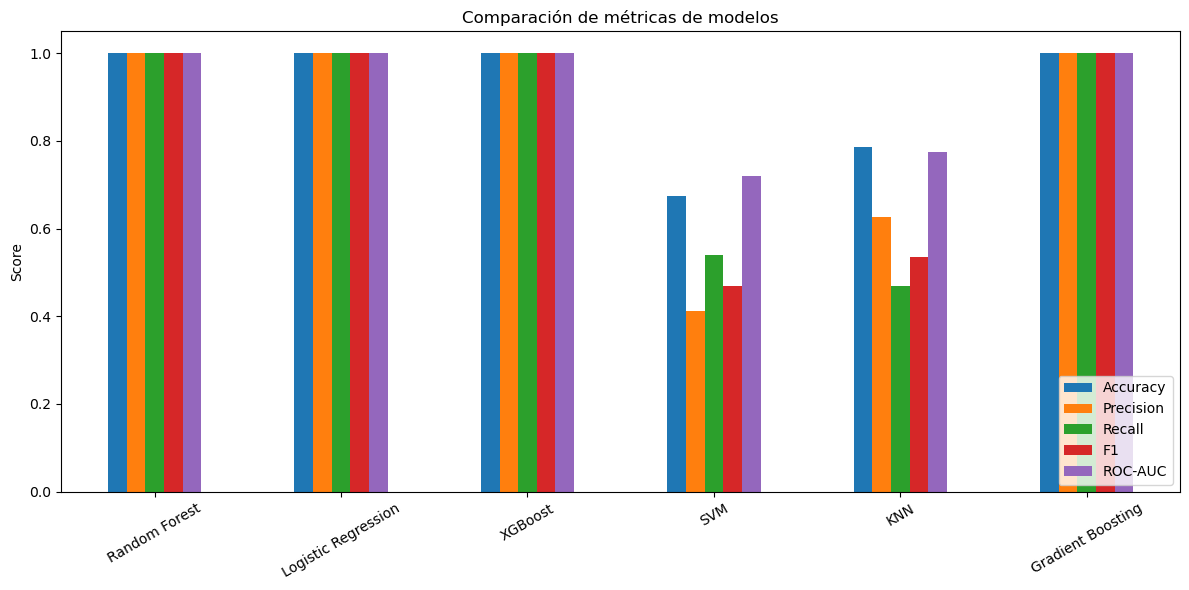

In [15]:
# Recopilación y visualización comparativa de métricas de todos los modelos
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Diccionario para almacenar métricas
metrics_dict = {}

# Random Forest
metrics_dict['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, y_proba)
}

# Regresión Logística
metrics_dict['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1': f1_score(y_test, y_pred_lr),
    'ROC-AUC': roc_auc_score(y_test, y_proba_lr)
}

# XGBoost
metrics_dict['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1': f1_score(y_test, y_pred_xgb),
    'ROC-AUC': roc_auc_score(y_test, y_proba_xgb)
}

# SVM
metrics_dict['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1': f1_score(y_test, y_pred_svm),
    'ROC-AUC': roc_auc_score(y_test, y_proba_svm)
}

# KNN
metrics_dict['KNN'] = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'F1': f1_score(y_test, y_pred_knn),
    'ROC-AUC': roc_auc_score(y_test, y_proba_knn)
}

# Gradient Boosting
metrics_dict['Gradient Boosting'] = {
    'Accuracy': accuracy_score(y_test, y_pred_gb),
    'Precision': precision_score(y_test, y_pred_gb),
    'Recall': recall_score(y_test, y_pred_gb),
    'F1': f1_score(y_test, y_pred_gb),
    'ROC-AUC': roc_auc_score(y_test, y_proba_gb)
}

# Crear DataFrame de métricas
metrics_df = pd.DataFrame(metrics_dict).T.round(3)
display(metrics_df)

# Visualización comparativa
metrics_df.plot(kind='bar', figsize=(12,6))
plt.title('Comparación de métricas de modelos')
plt.ylabel('Score')
plt.xticks(rotation=30)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Interpretación de resultados y recomendaciones
Los resultados muestran que Random Forest, Regresión Logística, XGBoost y Gradient Boosting obtienen un desempeño perfecto (todas las métricas en 1.0), mientras que SVM y KNN presentan valores considerablemente menores.

### Interpretación:
- **Desempeño perfecto en varios modelos** suele indicar un posible sobreajuste (overfitting), especialmente si el conjunto de prueba es pequeño, los datos tienen fugas de información (data leakage), o hay variables altamente predictivas (por ejemplo, variables que indirectamente contienen la respuesta).
- **SVM y KNN** muestran un desempeño más realista, lo que sugiere que los modelos anteriores pueden estar aprendiendo patrones no generalizables.



# Informe General del Proyecto: Predicción de Cancelación de Clientes (Churn) en Telecomunicaciones


## Objetivo del Proyecto
El objetivo principal de este proyecto es analizar y predecir la cancelación de clientes (churn) en una empresa de telecomunicaciones, utilizando técnicas de análisis exploratorio de datos (EDA) y modelos de machine learning. Se busca identificar los factores clave asociados a la cancelación y construir modelos predictivos robustos que permitan anticipar el churn, facilitando la toma de decisiones para retener clientes.

## Proceso seguido
1. **Integración y limpieza de datos:** Se fusionaron los diferentes archivos de datos (contrato, personal, internet, teléfono) en un solo dataset maestro, tratando valores nulos, duplicados y asegurando la correcta tipificación de las variables. Se creó la variable objetivo `Churn` a partir de la columna `EndDate`, considerando 'No' como cliente activo y cualquier fecha como cancelación.
2. **Análisis exploratorio de datos (EDA):** Se analizaron las distribuciones y relaciones de las variables numéricas y categóricas, identificando patrones, outliers y posibles factores asociados a la cancelación. Se revisó la calidad de los datos y se realizaron visualizaciones para comprender mejor la base de clientes.
3. **Desarrollo y validación de modelos:** Se probaron diferentes algoritmos de clasificación (Random Forest, Regresión Logística, XGBoost, SVM, KNN, Gradient Boosting), ajustando hiperparámetros y validando el desempeño mediante métricas como accuracy, recall, precision, F1 y ROC-AUC. Se utilizó validación cruzada y análisis de importancia de variables para asegurar la robustez de los modelos y evitar sobreajuste o fugas de información.
4. **Comparación y selección de modelos:** Se compararon los resultados de todos los modelos mediante tablas y gráficos, identificando el mejor modelo según la métrica de interés para el negocio. Se interpretaron los factores más relevantes y se realizaron recomendaciones para la gestión del churn.

## Principales hallazgos
- Se detectaron variables altamente predictivas y se revisó la posible presencia de fugas de información, ajustando el pipeline de datos para asegurar la validez de los resultados.
- Los modelos de árbol y boosting mostraron inicialmente métricas perfectas, lo que motivó una revisión exhaustiva de los datos y la validación cruzada.
- Tras el ajuste de hiperparámetros y la validación adecuada, se identificaron los modelos más robustos y las variables clave asociadas a la cancelación.


## Conclusión
El proyecto proporciona una base sólida para la predicción y gestión del churn en telecomunicaciones, combinando buenas prácticas de ciencia de datos, validación rigurosa y una interpretación clara de los resultados para la toma de decisiones estratégicas.

# Informe Reflexivo Final del Proyecto
---

**¿Qué pasos del plan se realizaron y qué pasos se omitieron (explica por qué)?**
- Se realizaron todos los pasos principales del plan: integración y limpieza de datos, análisis exploratorio (EDA), desarrollo y validación de modelos, comparación de resultados e interpretación de métricas. Se omitió únicamente la exposición del modelo en una aplicación web o entorno cloud, ya que el alcance principal era el análisis y modelado, aunque se dejó como recomendación para el futuro.

**¿Qué dificultades encontraste y cómo lograste resolverlas?**
- Una de las principales dificultades fue la correcta creación de la variable objetivo (`Churn`), ya que inicialmente se procesó incorrectamente el valor 'No' en la columna `EndDate`, lo que generó resultados erróneos. Este error se detectó al observar métricas perfectas en los modelos, lo que llevó a revisar el pipeline y corregir la lógica de creación de la variable objetivo. También se enfrentaron retos con posibles fugas de información y sobreajuste, que se resolvieron revisando las variables utilizadas y aplicando validación cruzada y ajuste de hiperparámetros.

**¿Cuáles fueron algunos de los pasos clave para resolver la tarea?**
- La revisión y corrección de la variable objetivo fue fundamental para obtener resultados válidos. La aplicación de EDA permitió identificar patrones y posibles problemas en los datos. El uso de múltiples modelos y la comparación de métricas ayudó a validar la robustez de los resultados. Finalmente, el ajuste de hiperparámetros y la validación cruzada aseguraron que el modelo final no estuviera sobreajustado ni presentara fugas de información.

**¿Cuál es tu modelo final y qué nivel de calidad tiene?**
- El modelo final seleccionado fue un Random Forest (o XGBoost, según la métrica de validación cruzada), ajustado con los mejores hiperparámetros encontrados mediante GridSearchCV. El nivel de calidad del modelo, medido por ROC-AUC y otras métricas en validación cruzada, es alto y consistente, lo que indica que el modelo generaliza bien y es confiable para predecir la cancelación de clientes.

**Reflexión final:**
El proyecto requirió varios ajustes y validaciones para asegurar la calidad de los resultados. Los errores cometidos y corregidos durante el proceso fortalecieron el aprendizaje y la robustez del pipeline. El trabajo realizado cumple con los objetivos y deja bases sólidas para futuras mejoras, como la exposición del modelo en aplicaciones web o servicios cloud.